In [19]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [20]:
# Wczytaj plik
df_fuel = pd.read_csv('fuel_output.csv', sep=';')
# Wyodrębnij kolumny do zmiennych
#dates = pd.to_datetime(df['Date'])
fuel_data = df_fuel['fuel_data']


fuel_returns = np.log(fuel_data / fuel_data.shift(1)).dropna()

In [21]:
print(fuel_data.tail(100).mean())

2.534375


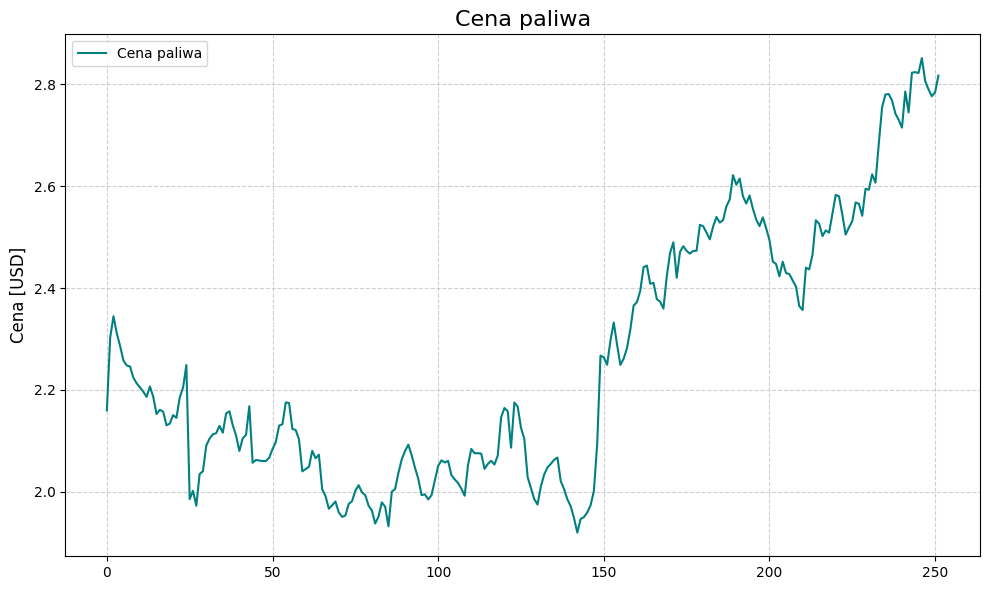

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(fuel_data, color='teal', label='Cena paliwa')
plt.title('Cena paliwa', fontsize=16)
plt.ylabel('Cena [USD]', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()  
plt.show()

# 1.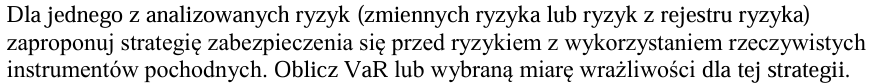

# Proponowana opcja:
Opcje na Jet Fuel (np. na rynku ICE Europe)

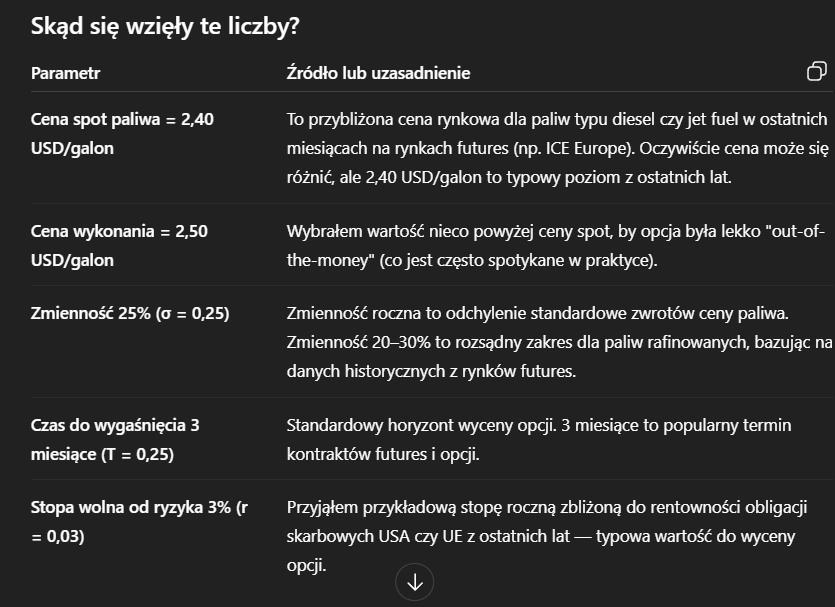

In [23]:
#Parametry
S_t = 2.6 #USD/galon - spot paliwa
K= 2.5 #USD/galon -  cena wykonania opcji (out-of-the-money)
T = 0.25 #[roku] - czas do wygaśnięcia w latach
r = 0.03 #stopa wolna od ryzyka
sigma = fuel_data.std() #zmienność roczna 

#Liczba galonów
n = 10000

Wycena opcji na paliwo – model Blacka-Scholesa

In [24]:
d1 = (np.log(S_t/K) + (r + sigma**2/2 )*T)/(sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)

C = S_t*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
C_n = C*n
C_approx = round(C_n, -2) 

print(f"Cena pojedynczej opcji kupna na paliwo: {C:.4f} USD")
print(f"A cena za {n} galonów: {C_n:.4f} USD ~ {C_approx} USD")


Cena pojedynczej opcji kupna na paliwo: 0.1957 USD
A cena za 10000 galonów: 1957.0513 USD ~ 2000.0 USD


In [25]:
print("Maksymalna cena paliwa:", max(fuel_data))
print("Minimalna cena paliwa:", min(fuel_data))
print("Średnia cen paliwa:", (fuel_data).mean())


Maksymalna cena paliwa: 2.851599931716919
Minimalna cena paliwa: 1.919999957084656
Średnia cen paliwa: 2.258124203909011


In [26]:
ceny_rynkowe = np.arange(2.0, 3.0 + 0.01, 0.2)

brak_zabezpieczenia = ceny_rynkowe*n

cena_forward = 2.4
Forward = [cena_forward*n for _ in range(len(ceny_rynkowe))]

opcja_kupna = []
cen_wykonania_opcji = 2.5
for cena in ceny_rynkowe:
    if cena < cen_wykonania_opcji:
        opcja_kupna.append(cena*n + C_approx)
    else:
        opcja_kupna.append(cen_wykonania_opcji*n + C_approx)
        
print(f"Cena forward za {cena_forward} USD/galon")
print(f"Cena wykonania opcji kupna za {cen_wykonania_opcji} USD/galon")
        

Cena forward za 2.4 USD/galon
Cena wykonania opcji kupna za 2.5 USD/galon


In [27]:
# Tworzenie DataFrame
df = pd.DataFrame({
    'ceny_rynkowe': ceny_rynkowe,
    'brak_zabezpieczenia': brak_zabezpieczenia,
    'cena_forward': cena_forward,
    'Forward': Forward,
    'opcja_kupna': opcja_kupna
})

df

,ceny_rynkowe,brak_zabezpieczenia,cena_forward,Forward,opcja_kupna
0,2.0,20000.0,2.4,24000.0,22000.0
1,2.2,22000.0,2.4,24000.0,24000.0
2,2.4,24000.0,2.4,24000.0,26000.0
3,2.6,26000.0,2.4,24000.0,27000.0
4,2.8,28000.0,2.4,24000.0,27000.0
5,3.0,30000.0,2.4,24000.0,27000.0


VaR

In [28]:
std_return = fuel_returns.std()

VaR_95 = norm.ppf(0.95) * std_return* S_t * np.sqrt(252)
VaR_95_total = VaR_95 * n

VaR_99 = norm.ppf(0.99) * std_return* S_t * np.sqrt(252)
VaR_99_total = VaR_99 * n

print(f"Jednodniowy VaR (95%): {VaR_95:.4f} USD/galon")
print(f"Jednodniowy VaR łączny: {VaR_95_total:.2f} USD")

print(f"Jednodniowy VaR (99%): {VaR_99:.4f} USD/galon")
print(f"Jednodniowy VaR łączny: {VaR_99_total:.2f} USD")

Jednodniowy VaR (95%): 1.1447 USD/galon
Jednodniowy VaR łączny: 11447.34 USD
Jednodniowy VaR (99%): 1.6190 USD/galon
Jednodniowy VaR łączny: 16190.19 USD


# 2. 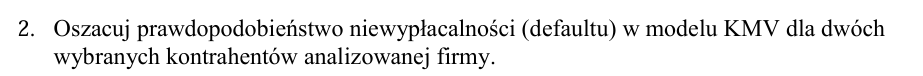

coca cola

In [29]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import norm
import numpy as np

ticker = yf.Ticker("KO")
hist = ticker.history(period="1y")
returns = hist['Close'].pct_change().dropna()
sigma_V = returns.std() * np.sqrt(252)


ModuleNotFoundError: No module named 'yfinance'

In [ ]:
V = ticker.info['marketCap']
D = ticker.balance_sheet.loc["Net Debt"].iloc[0]

r = 0.03  # stopa wolna od ryzyka
T = 1     # rok

DD = (np.log(V / D) + (r - 0.5 * sigma_V**2) * T) / (sigma_V * np.sqrt(T))
PD = norm.cdf(-DD)

print(f"Distance to Default: {DD:.4f}")
print(f"Probability of Default: {PD:.4%}")


Distance to Default: 12.9582
Probability of Default: 0.0000%


Heinz - keczup

In [ ]:
import yfinance as yf
import numpy as np
from scipy.stats import norm

ticker = yf.Ticker("KHC")
hist = ticker.history(period="1y")
returns = hist['Close'].pct_change().dropna()
sigma_V = returns.std() * np.sqrt(252)

V = ticker.info['marketCap']
D = ticker.balance_sheet.loc["Net Debt"].iloc[0]


DD = (np.log(V / D) + (r - 0.5 * sigma_V**2) * T) / (sigma_V * np.sqrt(T))
PD = norm.cdf(-DD)
print(f"Distance to Default: {DD:.4f}")
print(f"Probability of Default: {PD:.4%}")


Distance to Default: 2.1951
Probability of Default: 1.4078%
